In [2]:
import keras

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


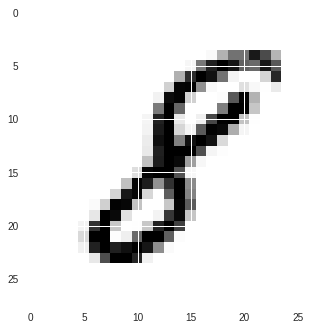

In [0]:

import matplotlib.pyplot as plt
# %matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape
y_train[1].shape

()

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
import tensorflow as tf

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.2109 - acc: 0.9368
Epoch 2/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0863 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.0599 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.0430 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0360 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 47s 785us/step - loss: 0.0300 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0249 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.0230 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 48s 795us/step - loss: 0.0194 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 47s 792us/step - loss: 

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 252us/step


[0.06020205089348092, 0.9866]

9


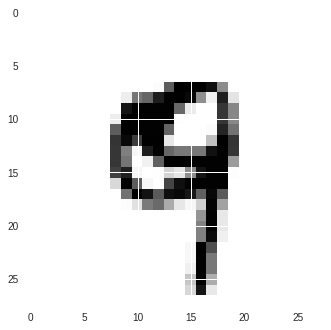

In [0]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
# print(pred)
print(pred.argmax())

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist-model-CNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist-model-CNN-Weights.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# from google.colab import files
files.download("mnist-model-CNN.json")
files.download("mnist-model-CNN-Weights.h5")